# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

<hr/>

## ReLU

<br/>

<hr/>

### Problem of Sigmoid


<br/>

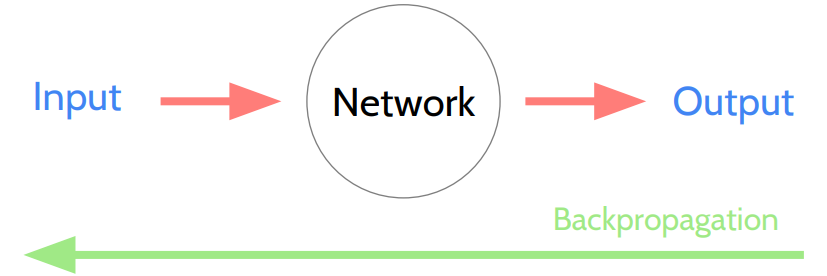


위 그림은 입력에 따른 전파와 출력의 오차값에 따른 역전파(Back Propagation)을 도식화한 것이다. 그 과정을 설명하면 아래와 같다.

1. input에 weight를 곱하고 sigmoid를 활성함수로 사용해 output을 구한다.
2. 정답 데이터인 G(t)와 output의 차이를 이용해서 오차(cost 또는 loss) 값을 구한다.
3. loss를 바탕으로 미분을 통해 gradient를 구한다.
4. Back Propagation 알고리즘을 통해 gradient로 weight를 업데이트한다.

<br/>

Sigmoid의 문제점은 Gradient를 계산하면서 발생하게 된다. 아래 그림은 Sigmoid 함수를 그래프로 그린 것이다.

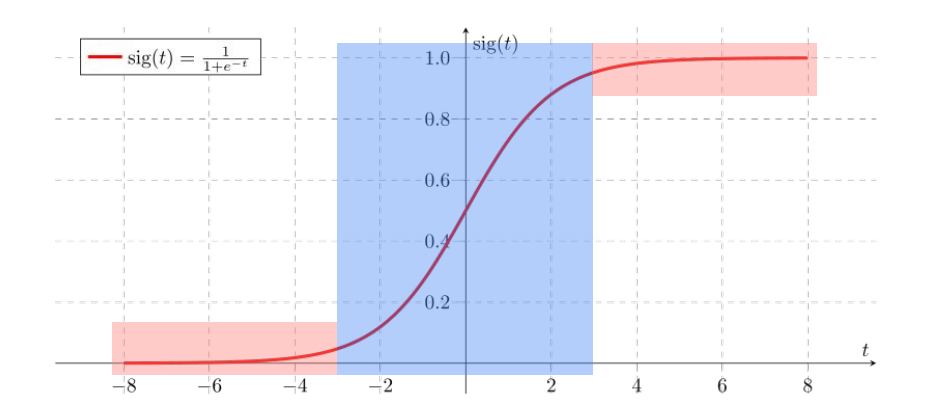

<br/>

파란 영역은 gradient가 잘 계산되겠지만, 문제는 붉은 영역(양끝)이다. 양 끝 부분의 기울기는 0에 가깝기 때문에 gradient 값은 0혹은 0에 아주 가까운 값으로 나오게 될 것이다. 이것이 왜 문제가 될까? 뒤단에 loss로부터 전파되는 gradient가 소멸되는 문제가 발생할 수 있기 때문이다. 이런 현상을 **Vanishing Gradient**라고 한다.<br/>
단층 구조라면 별 문제가 없겠지만 sigmoid를 활성함수로 사용하는 여러 layer가 쌓였을 때 0에 가까운 gradient가 계속해서 곱해지게 되면 앞단에서는 거의 gradient를 전파받을 수 없게 된다.

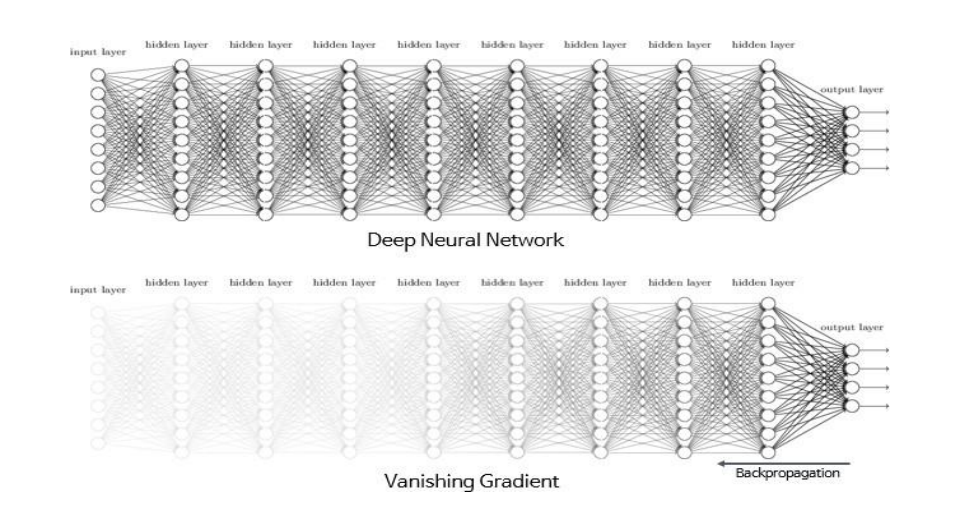

<br/>

<hr/>


### ReLU

<br/>

ReLU의 수식은 아래와 같이 나타낼 수 있다. <br/>
$ f(x) = max(0, x) $ <br/>
이 수식의 의미는 x가 입력되었을 때, 만약 x가 0보다 크면 x를 출력하고, 반대로 x가 음수라면 0을 출력하는 것이다.

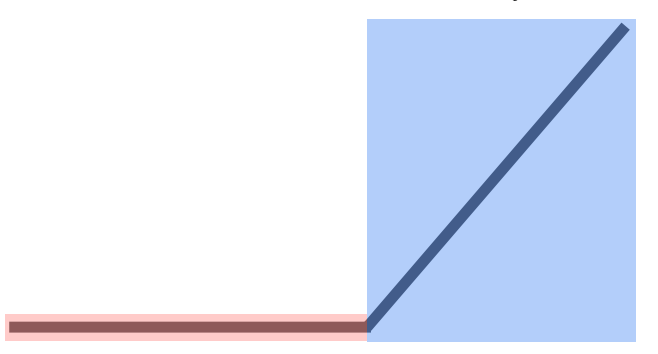

<br/>

- 활성 함수의 종류

```python
# 시그모이드
x = torch.nn.sigmoid(x)

# ReLU
x = torch.nn.relu(x)

# leaky relu
torch.nn.leaky_relu(x, 0.01)

# Hyperbolic Tangent
torch.nn.tanh(x)
```

<br/>

<hr/>

### Optimizer in PyTorch

<br/>

torch.optim 라이브러리는 다양한 optimizer들을 제공한다. 아래는 그 예시이다.

- torch.optim.SGD
- torch.optim.Adadelta
- torch.optim.Adagrad
- torch.optim.Adam
- torch.optim.SparseAdam
- torch.optim.Adamax
- torch.optim.ASGD
- torch.optim.LBFGS
- torch.optim.RMSprop
- torch.optim.Rprop

<br/>

#### optimizer 관련한 정보 링크

- 학습하면서 각 optimizer가 어떻게 수렴하는지, 어떻게 해를 찾아나가는지 비교를 해놓은 그림

https://pytorch.org/docs/master/optim.html#torch-optim  <br/>
http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html


<br/>

#### Optimizer의 발달 계보

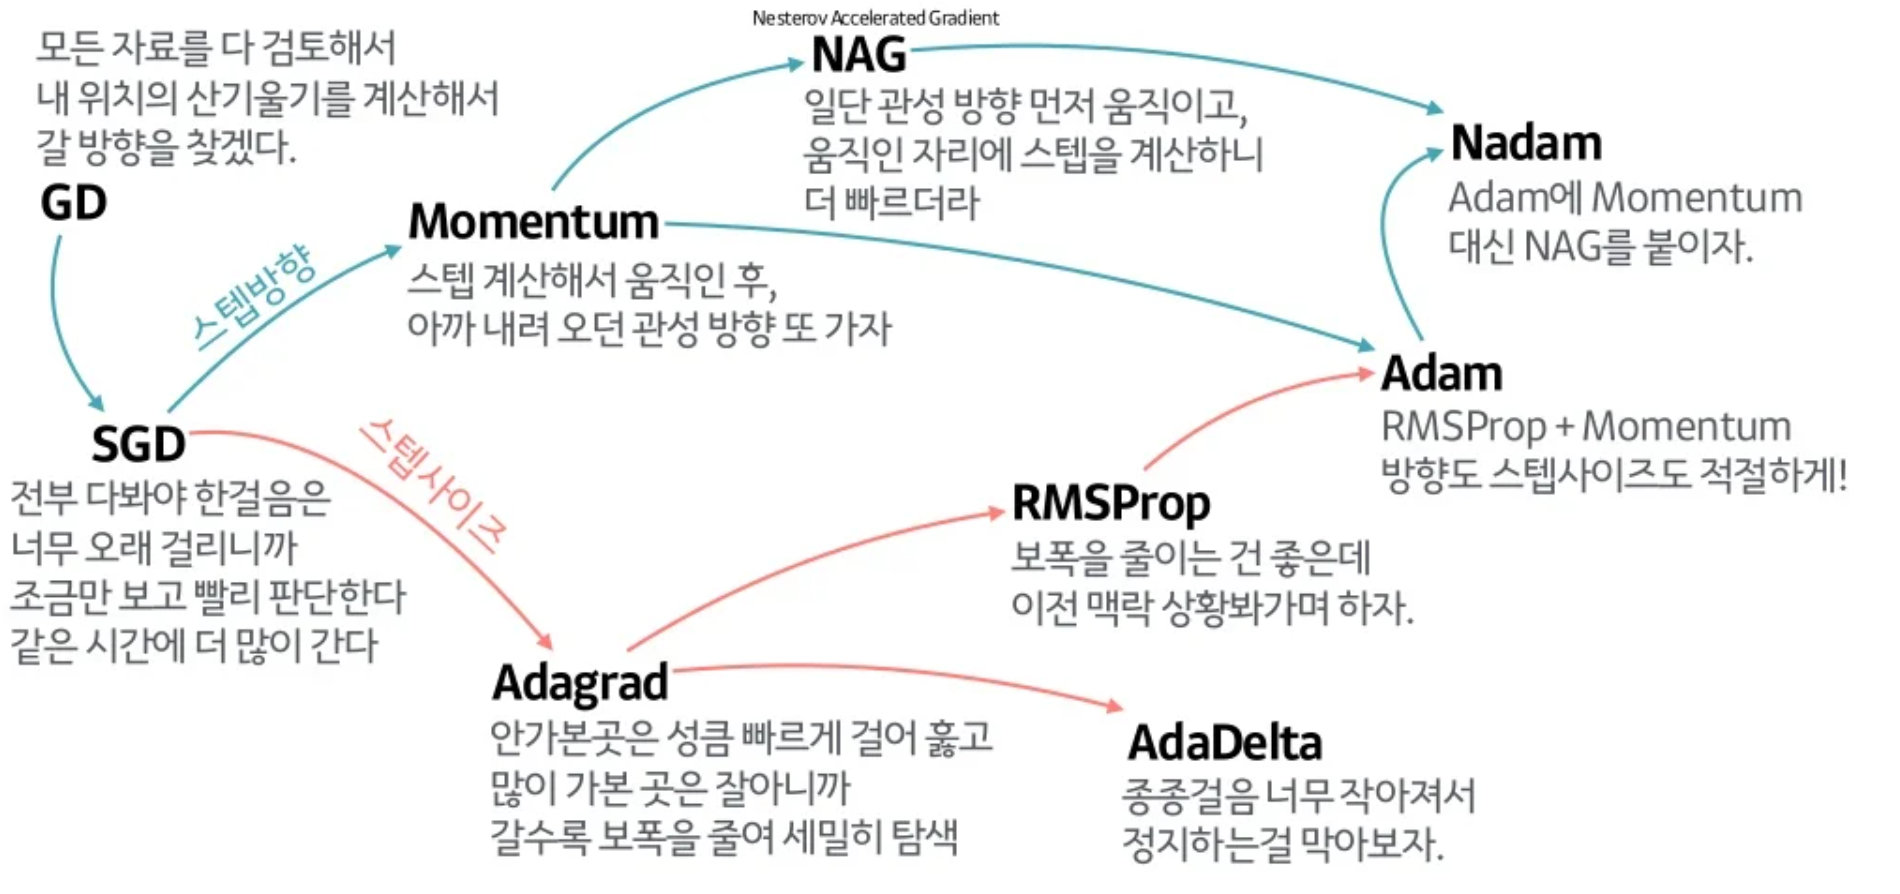

출처링크: [자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다.](https://www.slideshare.net/yongho/ss-79607172)

<br/>


<hr/>

### Code

#### MNIST Softmax

In [5]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [8]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# Initialization
torch.nn.init.normal_(linear.weight)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
# Lab7과 차이점
# Adam Optimizer
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [9]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 5.090342045
Epoch: 0002 cost = 1.624639869
Epoch: 0003 cost = 1.060704231
Epoch: 0004 cost = 0.844545186
Epoch: 0005 cost = 0.724808514
Epoch: 0006 cost = 0.647177458
Epoch: 0007 cost = 0.591050744
Epoch: 0008 cost = 0.547791421
Epoch: 0009 cost = 0.513751209
Epoch: 0010 cost = 0.486737639
Epoch: 0011 cost = 0.463545769
Epoch: 0012 cost = 0.444643378
Epoch: 0013 cost = 0.428184003
Epoch: 0014 cost = 0.414159089
Epoch: 0015 cost = 0.401649684
Learning finished


In [10]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.8901999592781067
Label:  8
Prediction:  8


C:\Users\ghpmc\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\ghpmc\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<br/>

#### MNIST nn

- accuracy를 확인해보면 다층구조가 더 좋은 정확도를 가진다는 것을 알 수 있다.

In [11]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 150.338470459
Epoch: 0002 cost = 40.185184479
Epoch: 0003 cost = 25.047693253
Epoch: 0004 cost = 17.354589462
Epoch: 0005 cost = 12.655422211
Epoch: 0006 cost = 9.311787605
Epoch: 0007 cost = 7.007887363
Epoch: 0008 cost = 5.319697857
Epoch: 0009 cost = 3.946989298
Epoch: 0010 cost = 3.024857998
Epoch: 0011 cost = 2.254566193
Epoch: 0012 cost = 1.676398516
Epoch: 0013 cost = 1.369900227
Epoch: 0014 cost = 1.163248897
Epoch: 0015 cost = 0.780548275
Learning finished


In [13]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9488999843597412
Label:  5
Prediction:  5
